In [ ]:
import os
import numpy as np
def char_to_int(char) -> int:
    try:
        return int(char)
    except:
        lookup = "ABCDEF"
        return 10+lookup.find(char.upper())
def hex_to_dec(number) -> int:
    output = 0
    current_n = len(number) - 1
    for char in number:
        output+= (char_to_int(char))*(16**current_n)
        current_n-=1
    return output
def hex_to_dec_signed(number) -> int:
    output = 0
    neg = char[0]=="1"
    current_n = len(number) - 2
    for char in number[1:]:
        output+= (char_to_int(char))*(16**current_n)
        current_n-=1
    return -1*output if neg else 1
def dec_to_hex(number: int, bits: int) -> str:
    string = ""
    while (number!=0):
        res = number%16
        if (res>=10):
            res="ABCDEF"[res-10]
        string=f"{res}{string}"
        number=int(number/16)
    return string
def dec_to_bin(number: int, bits=-1):
    neg=False
    out=""
    if (number<0):
        number*=-1
        number-=1
        neg=True
    while (number>0):
        res = number%2
        if (neg):
            res= 0 if (res==1) else 1
        out=f"{res}{out}"
        if (len(out)==(bits-1)):
            break
        number=int(number/2)
        
    if (neg):
        out=f"{1}{out}"
    else: out=f"{0}{out}"
    if (len(out)==0):
        out="0"
    while (len(out)<bits):
        out=f"{out[0]}{out}"
    return out

def dec_to_base(number: int, base: int) -> str:
    string = ""
    while (number!=0):
        res = number%base
        if (res>=10):
            res="ABCDEFGHIJKLMNOPQRSTUVWXYZ"[res-10]
        string=f"{res}{string}"
        number=int(number/base)
    return string


In [35]:
with open(r"softmax_exp_18_10_10_4.dat") as f:
    content = f.read()
    data = content.split("\n")
numbers = []
for line in data:
    res = hex_to_dec(line)
    numbers.append(res)
numbers=np.array(numbers)


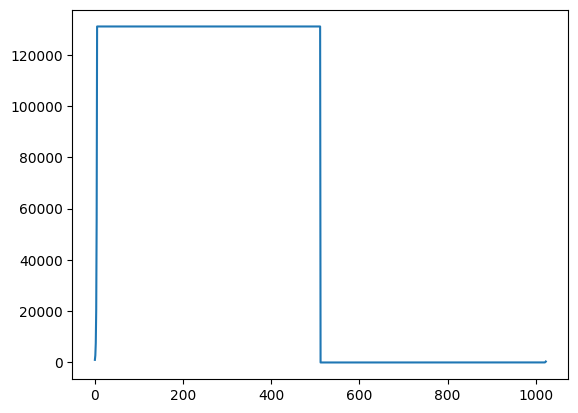

In [36]:
import matplotlib.pyplot as plt
plt.plot(numbers)
plt.show()

In [60]:
# Custom range
width_lookup=10
nfrac_lookup=6
width = 18
nfrac = 10
min_val = 2**(-1*nfrac)
MIN=-2**(width_lookup-1-nfrac_lookup)
MAX=2**(width_lookup-1-nfrac_lookup)-2**(-nfrac_lookup)
length = 2**width_lookup
interval = 1/(2**nfrac_lookup)
print(MAX)
print(MIN)
print(interval)
print(length)

7.984375
-8
0.015625
1024


In [61]:
ind=np.linspace(MIN, MAX, length)
print(ind[1]-ind[0])
print(interval)

0.015625
0.015625


In [102]:
def index_of(arr, item):
    for i, ent in enumerate(arr):
        if (ent==item):
            return i
    return -1

In [107]:
print(np.linspace)

<function linspace at 0x000002198985DA80>


In [ ]:
def table_gen(eq, width_lookup, nfrac_lookup, width, nfrac, signed, name):
    MIN=-2**(width_lookup-1-nfrac_lookup)
    MAX=2**(width_lookup-1-nfrac_lookup)-2**(-nfrac_lookup)
    ind=np.linspace(MIN, MAX, length)
    arr = eq(ind)
    split = index_of(arr, 1)
    arr=np.concatenate((arr[split:],arr[0:split]))
    sig_int = 1 if signed else 0
    max_val=(2**(width-sig_int)-1)/(2**nfrac)
    with open(f"{name}_table_{width}_{nfrac}_{width_lookup}_{nfrac_lookup}.dat", "w") as f:
        for elem in arr:
            elem = min(elem, max_val)
            item = dec_to_bin(int(elem*(2**nfrac)), width+1-sig_int)
            f.write(item[1-sig_int:])
            f.write("\n")

In [110]:
table_gen(np.exp, width_lookup, nfrac_lookup, width, nfrac, False, "exp")

In [42]:
# Range of data should be +-(2**(width_lookup-1-nfrac_lookup)-2**(-nfrac_lookup))
width_lookup=10
nfrac_lookup=6
width = 18
nfrac = 10
MIN=-2**(width_lookup-1-nfrac_lookup)
MAX=2**(width_lookup-1-nfrac_lookup)-2**(-nfrac_lookup)
length = 2**width_lookup
interval = 1/(2**nfrac_lookup)
print(MAX)
print(MIN)
print(interval)
print(length)

7.984375
-8
0.015625
1024


In [106]:
ind=np.linspace(MIN, MAX, length)
arr = np.exp(ind)
split = index_of(arr, 1)
arr=np.concatenate((arr[split:],arr[0:split]))
print(arr)
max_val=(2**width-1)/(2**nfrac)
with open(f"exp_table_{width}_{nfrac}_{width_lookup}_{nfrac_lookup}", "w") as f:
    for elem in arr:
        elem = min(elem, max_val)
        item = dec_to_bin(int(elem*(2**nfrac)), width+1)
        f.write(item)
        f.write("\n")

[1.         1.01574771 1.03174341 ... 0.95420667 0.96923323 0.98449644]


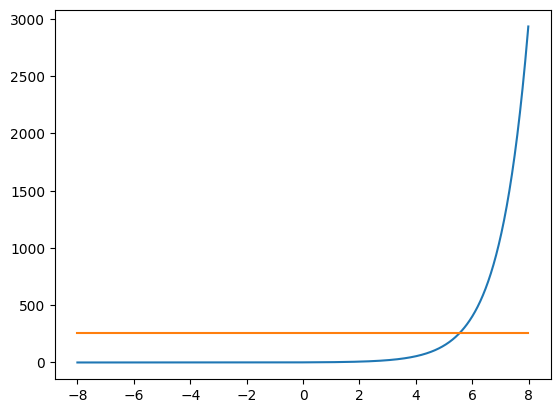

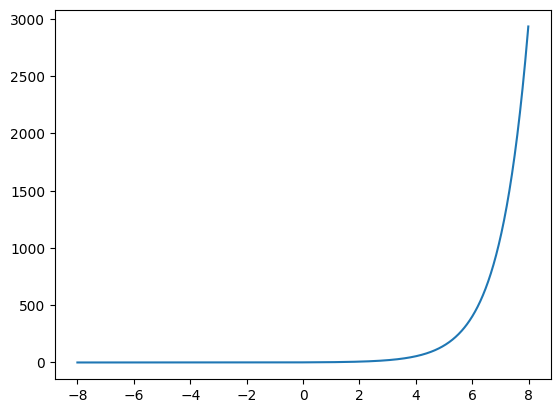

In [62]:
import matplotlib.pyplot as plt
max_val = (2**(width-nfrac))-1/(2**nfrac)
arr = np.exp(ind)
max = np.ones(length)*max_val
plt.plot(ind, arr)
plt.plot(ind, max)

plt.show()

arr = np.round((arr/min_val))*min_val
plt.plot(ind, arr)
plt.show()


[1197, 1, 1198]


C:\Users\caleb\AppData\Local\Temp\ipykernel_17896\3294398034.py:21: OptimizeWarning: Covariance of the parameters could not be estimated
  param, cov = opt.curve_fit(fit_eq, test_ind, test_arr)


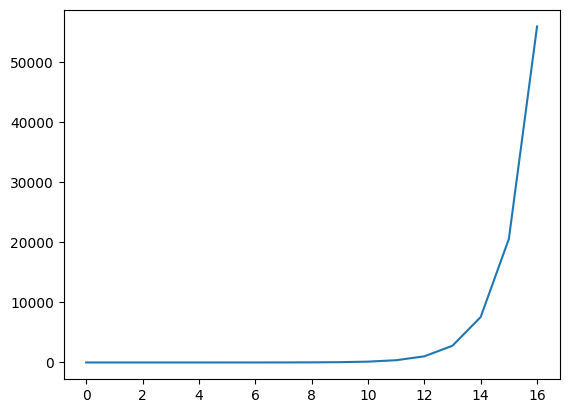

In [ ]:
with open(r"softmax_stable_ap_fixed_ap_fixed_16_10_5_3_0_softmax_config16_s_exp_table1_rom.dat") as f:
    content = f.read()
    data = content.split("\n")
numbers = []
for line in data:
    res = hex_to_dec(line)
    numbers.append(res)
nfrac_lookup=10
numbers=np.array(numbers)
import matplotlib.pyplot as plt
ind = np.linspace(-32,32, 1024)

fixed = np.concatenate((numbers[512:],numbers[:512]))
#fixed=fixed/2**nfrac_lookup
plt.plot(fixed[500:517])
import scipy.optimize as opt
def fit_eq(x, a, b, c):
    y = a*np.exp(b*x-c)
    return y
test_arr = fixed[500:517]
test_ind = np.linspace(0,17,len(test_arr))
param, cov = opt.curve_fit(fit_eq, test_ind, test_arr)
print([int(np.round(x)) for x in param])
#plt.plot(np.exp(ind))
plt.show()